In [1]:
#|default_exp app

## Art Recognizer

In [2]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.1

In [3]:
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/MasterCourse/ArtRecognizer

/content/drive/My Drive/MasterCourse/ArtRecognizer


In [18]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [7]:
#!export
model = load_learner('models/art_style_model_v6.pkl')

In [8]:
#!export
art_style_labels = (
    'Abstract Expressionism',
    'Baroque',
    'Contemporary',
    'Cubism',
    'Impressionism',
    'Minimalism',
    'Pop Art',
    'Realism',
    'Renaissance',
    'Surrealism')

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(art_style_labels, map(float, probs)))

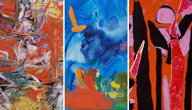

In [15]:
img = PILImage.create(f'test_images/unknown_04.jpg')
img.thumbnail((192,192))
img

In [16]:
recognize_image(img)

{'Abstract Expressionism': 0.9882382750511169,
 'Baroque': 0.00020992031204514205,
 'Contemporary': 4.663440904550953e-06,
 'Cubism': 0.010485821403563023,
 'Impressionism': 0.0004635351651813835,
 'Minimalism': 0.0002083864383166656,
 'Pop Art': 6.572182610398158e-05,
 'Realism': 7.160831592045724e-05,
 'Renaissance': 0.00024032642249949276,
 'Surrealism': 1.1781072316807695e-05}

In [20]:
#!export
image = gr.Image()
label = gr.Label()
examples = [
    'test_images/unknown_01.jpg',
    'test_images/unknown_02.jpg',
    'test_images/unknown_03.jpg',
    'test_images/unknown_04.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4632e34e1586dde022.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')